# Logistic regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
path = r"C:\Users\User\Desktop\Akshay project\Data set\loan_prediction.csv"
import chardet
with open (path,'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [3]:
data = pd.read_csv(path,encoding = 'ascii')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data.shape

(614, 13)

In [7]:
#The label here is loan status, so we check on the values of each output in loan status
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
#The loan of 422 people were approved as per above data

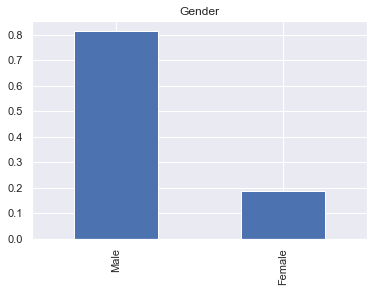

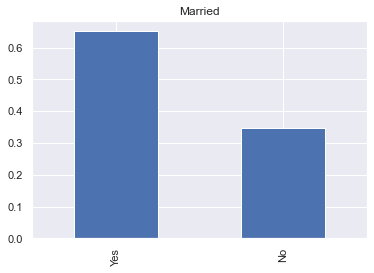

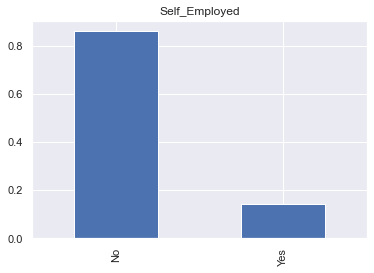

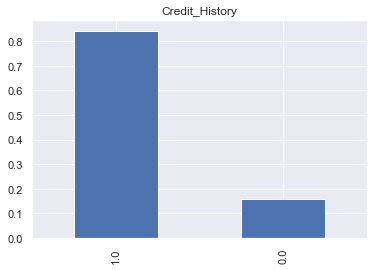

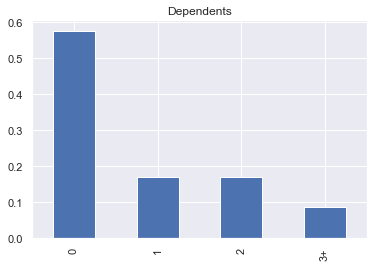

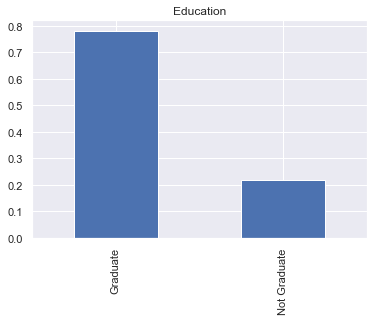

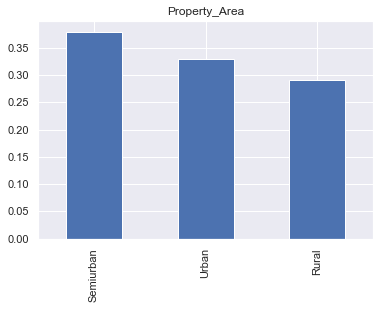

In [9]:
data['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.show()
data['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
data['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
data['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()
data['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')
plt.show()
data['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
data['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

In [10]:
#So we found out that around 80% of the loan applicants are male 
#65% applicants are married.
#85% applicants are not self-employed
#Around 85% of the people have very good credit history
#Most of the applicants don't have any dependents
#Around 80% of the applicants are Graduate
#Most of the applicants are from the Semiurban area

In [11]:
#Loan ID is not required since it is just an ID number, SO we will drop that column.
data = data.drop(columns = ['Loan_ID'])
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [13]:
#We will treat the missing values in this.
#Gender, married, dependents, self employed, credit history are all categorical values, so we use mode.
#Loan amount column we use median as the fillna since loan amount can be varied from min to max
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [15]:
#Lets coonvert object type into integer type by mapping
data['Gender'] = data['Gender'].map({'Female':0,'Male':1}).astype(np.int)
data['Married'] = data['Married'].map({'No':0, 'Yes':1}).astype(np.int)
data['Education'] = data['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
data['Self_Employed'] = data['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)
data['Loan_Status'] = data['Loan_Status'].map({'N':0, 'Y':1}).astype(np.int)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(5), int64(1), object(2)
memory usage: 45.7+ KB


In [17]:
X = data.drop(columns=['Loan_Status'])
y = data['Loan_Status']

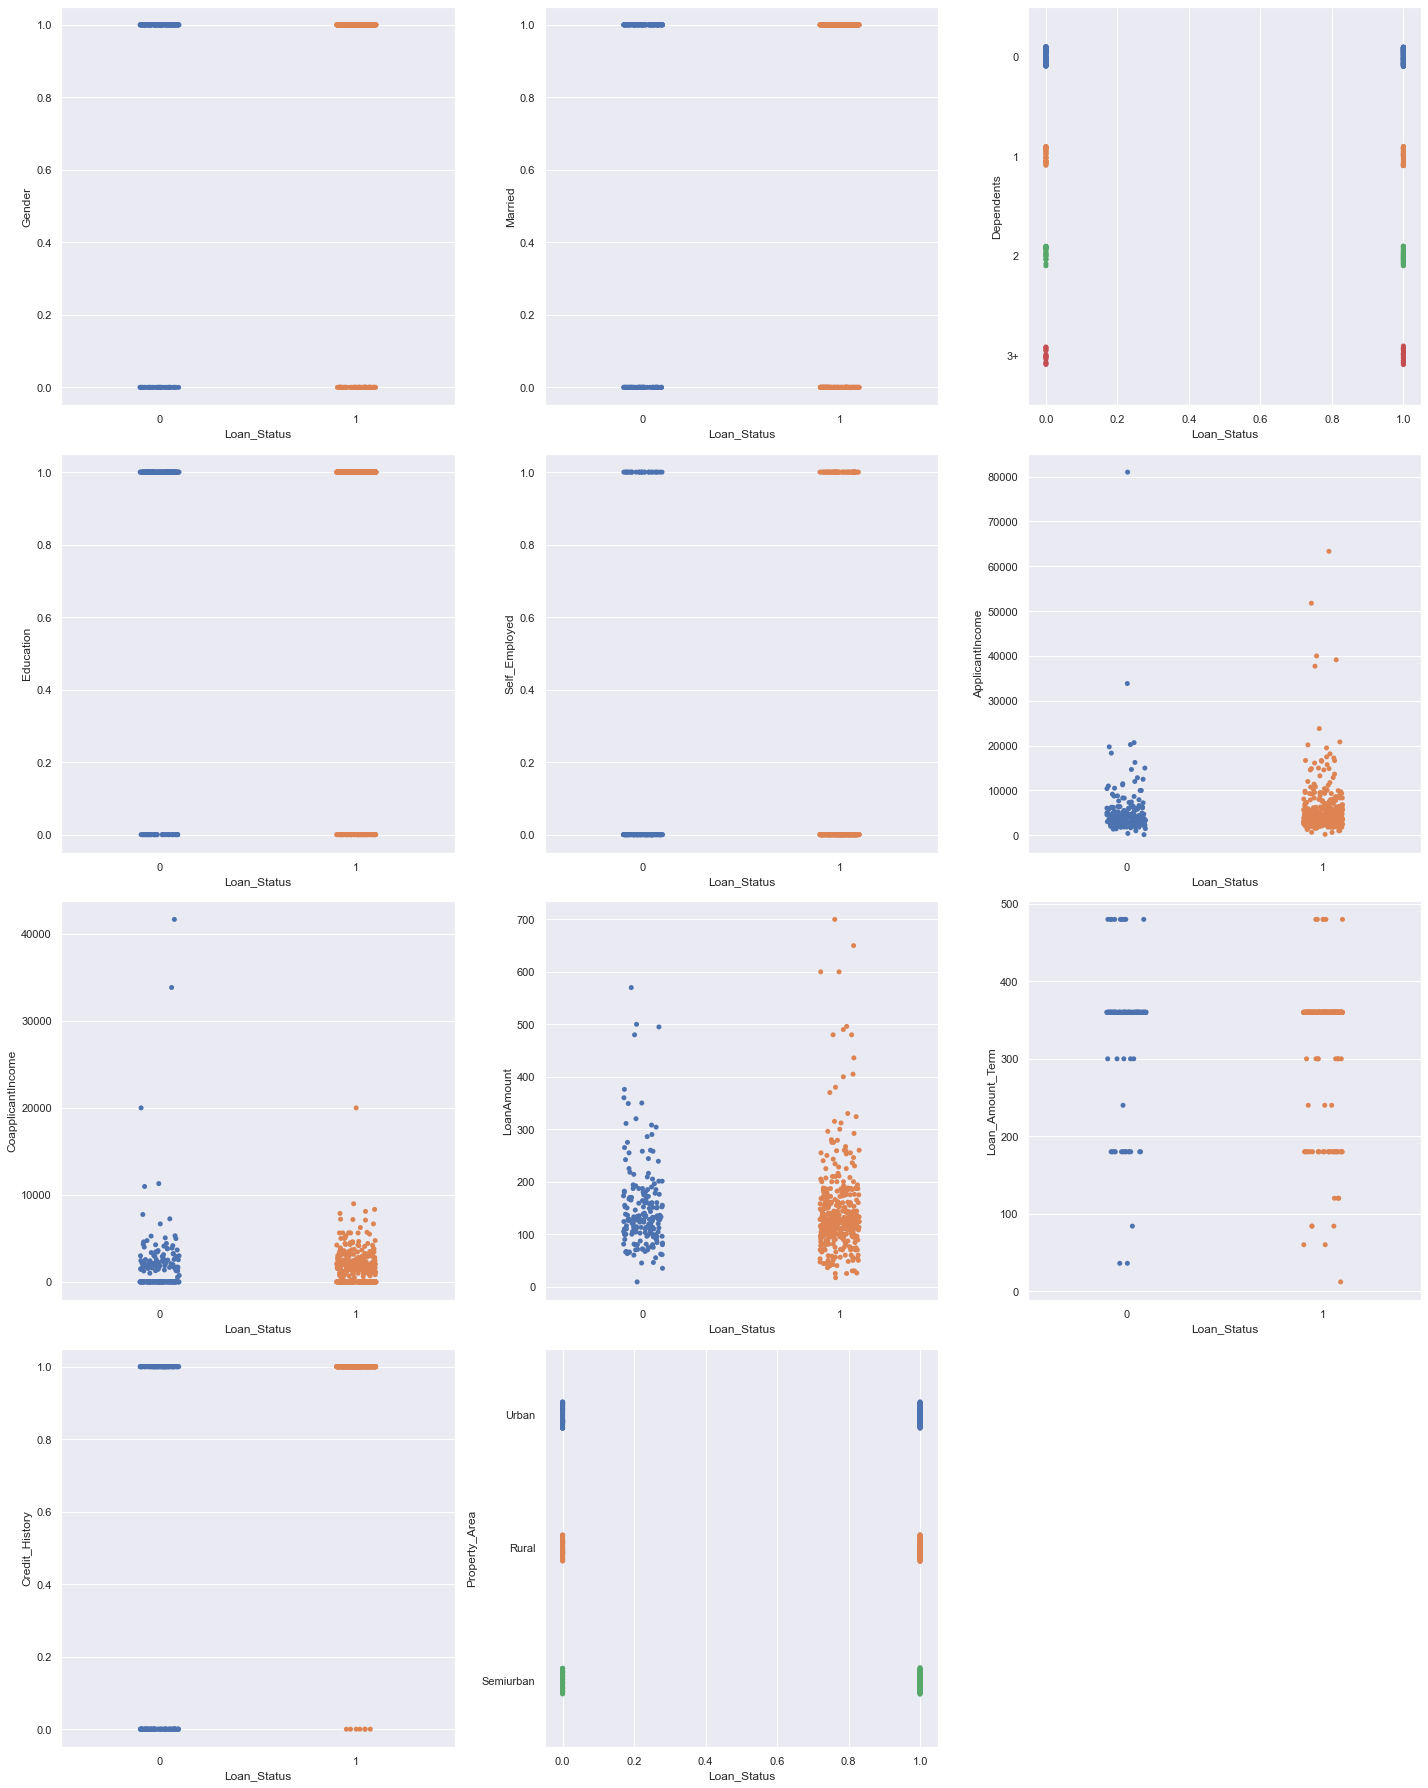

In [20]:
#Lets see how data is distributed for every column
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=12:
        ax =plt.subplot(4,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [22]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [23]:
#Lets convert property area into integer type by mapping
data['Property_Area'] = data['Property_Area'].map({'Urban':0,'Rural':1,'Semiurban':2}).astype(np.int)

In [24]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,0,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1


In [25]:
X = data.drop(columns=['Loan_Status'])
y = data['Loan_Status']

In [ ]:
#Lets check the multicollinearity on dependent variables. Before that lets scale our data
#Also lets drop the columns which are not required to predict the outcome like gender, marital status and other categorical values

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(6), int64(1), object(1)
memory usage: 43.3+ KB


In [32]:
X = data.drop(columns=['Loan_Status','Gender','Married','Dependents','Education','Self_Employed','Property_Area'])
y = data['Loan_Status']

In [33]:
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#Lets check the values
vif

,vif,Features
0,1.608782,ApplicantIncome
1,1.132699,CoapplicantIncome
2,1.644524,LoanAmount
3,1.017168,Loan_Amount_Term
4,1.000558,Credit_History


In [35]:
#all vif values are less than 5. So there is no multicollinearity

In [36]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.25, random_state=355)

In [37]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#Lets see how well our model performs on the test dataset

In [38]:
y_pred = log_reg.predict(x_test)

In [39]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7987012987012987

# Confusion metrix

In [40]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 18,  29],
       [  2, 105]], dtype=int64)

In [41]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [42]:
Accuracy = (true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)
Accuracy

0.7987012987012987

In [47]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.3829787234042553

In [44]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.9

In [45]:
#F1 score
F1_score = 2*(Recall*Precision)/(Recall+Precision)
F1_score

0.5373134328358209

In [46]:
#Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.6821435673096043

# KNN Model

In [49]:
#Lets fit the data into Knn model and see how well it performs
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [50]:
y_pred = knn.predict(x_test)

In [51]:
knn.score(x_train,y_train)

0.8282608695652174

In [52]:
print("The accuracy score is : ",accuracy_score(y_test,y_pred))

The accuracy score is :  0.7077922077922078


In [ ]:
#lets try to increase accuracy by using hyperparameter tuning

In [53]:
param_grid = {'algorithm' : ['ball_tree','kd_tree','brute'],
              'leaf_size' : [18,20,25,27,30,32,34],
              'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [55]:
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [56]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.728, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.739, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.739, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.793, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.761, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.772, total=   0.0s
[CV] algorith

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.793, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.859, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.772, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.804, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.826, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.804, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV] 

[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:   10.8s finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [57]:
#Lets see the best parameters according to gridsearch
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 9}

In [58]:
#we will use these parameters in our knn algorithm and check if accuracy is increasing
knn = KNeighborsClassifier(algorithm = 'ball_tree',leaf_size = 18, n_neighbors = 9)

In [59]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=9)

In [60]:
knn.score(x_train,y_train)

0.8282608695652174

In [61]:
knn.score(x_test,y_test)

0.7792207792207793

# We have a much better score in KNN model

# Random forest model

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rand_clf = RandomForestClassifier(random_state=41)

In [64]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=41)

In [65]:
rand_clf.score(x_test,y_test)

0.7727272727272727

In [ ]:
#hyper parameter tuning to improve the score

In [66]:
grid_param = {'n_estimators' : [90,100,115,130],
              'criterion' : ['gini','entropy'],
              'min_samples_leaf' : range(1,10,1),
              'min_samples_split' : range(2,10,1),
              'max_features' : ['auto','log2']
              }

In [67]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs=-1,verbose = 3)

In [68]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 13.5min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=41), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [90, 100, 115, 130]},
             verbose=3)

In [69]:
grid_search.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [70]:
rand_clf = RandomForestClassifier(criterion='gini',
                                 max_features = 'auto',
                                 min_samples_leaf= 5,
                                 min_samples_split=2,
                                 n_estimators= 100, random_state=41)

In [71]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(min_samples_leaf=5, random_state=41)

In [72]:
rand_clf.score(x_test,y_test)

0.7922077922077922

In [ ]:
# The score has increased after hyper paramete tuning.

# So the best model we have built is of random forest after hyper parameter tuning

In [73]:
import pickle
Loan_status = 'finalized_model.pickle'
pickle.dump(rand_clf,open(Loan_status,'wb'))

# Saved the model